In [13]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statistics import mean
from datetime import date

In [14]:
# start_date = '2023-4-10' # start of MAGS history
start_date = '2023-1-1' # start of uptrend
# start_date = '2022-1-1' # start of downtrend
history_map = {}
for symbol in ['SMH','USD','SOXL','SPY','QQQ','TQQQ','NVDA','FNGU','FNGS','MAGS','MAGX','MAG7.L','NVD3.L','QQQ5.L','SP5Y.L','SMH3.L','IYW','IGM','XLKS.MI']:
    tickerData = yf.Ticker(symbol)
    history = tickerData.history(interval='1wk', start=start_date, end=date.today()) # prices are adjusted for splits
    print(f'{symbol} history: {len(history)}w')
    history_map[symbol] = history

SMH history: 96w
USD history: 96w
SOXL history: 96w
SPY history: 96w
QQQ history: 96w
TQQQ history: 96w
NVDA history: 96w
FNGU history: 96w
FNGS history: 96w
MAGS history: 82w
MAGX history: 36w
MAG7.L history: 30w
NVD3.L history: 96w
QQQ5.L history: 96w
SP5Y.L history: 96w
SMH3.L history: 96w
IYW history: 96w
IGM history: 96w
XLKS.MI history: 96w


In [15]:
max_weeks = 60

df = pd.DataFrame()
for symbol in history_map:
    history = history_map[symbol]
    value = [None] # week 0
    for weeks in range(1, max_weeks+1):
        if len(history) <= weeks:
            value.append(None)
        else:
            stock_changes = history['Close'].pct_change(periods=weeks) * 100
            # value.append(stock_changes.median())
            value.append(stock_changes.mean())
            # value.append(stock_changes.mean() * 52 / weeks)
            # value.append(stock_changes.mean() / stock_changes.std())
            # value.append(stock_changes.std())
    df[symbol] = value

# df.iloc[1:].to_csv('data/mean-weekly-stock-gains.csv')

def plot(title, symbols):
  (df[symbols] * 1).plot(figsize=(16,9), marker='.')
  plt.legend()
  plt.title(title)
  plt.xlabel('weeks')
  plt.ylabel('average stock change %')
  plt.grid()


In [16]:
print(f'USD:SMH {(df.USD / df.SMH).mean():.1f}')
print(f'SMH3.L:SMH {(df["SMH3.L"] / df.SMH).mean():.1f}')
print(f'NVD3.L:NVDA {(df["NVD3.L"] / df.NVDA).mean():.1f}')
print(f'TQQQ:QQQ {(df.TQQQ / df.QQQ).mean():.1f}')
print(f'QQQ5.L:QQQ {(df["QQQ5.L"] / df.QQQ).mean():.1f}')
print(f'SP5Y.L:SPY {(df["SP5Y.L"] / df.SPY).mean():.1f}')
print(f'FNGU:FNGS {(df.FNGU / df.FNGS).mean():.1f}')
print(f'MAGX:MAGS {(df.MAGX / df.MAGS).mean():.1f}')
print(f'MAG7.L:MAGS {(df["MAG7.L"] / df.MAGS).mean():.1f}')

USD:SMH 3.0
SMH3.L:SMH 3.0
NVD3.L:NVDA 4.7
TQQQ:QQQ 2.8
QQQ5.L:QQQ 4.5
SP5Y.L:SPY 4.1
FNGU:FNGS 3.1
MAGX:MAGS 1.5
MAG7.L:MAGS 2.9


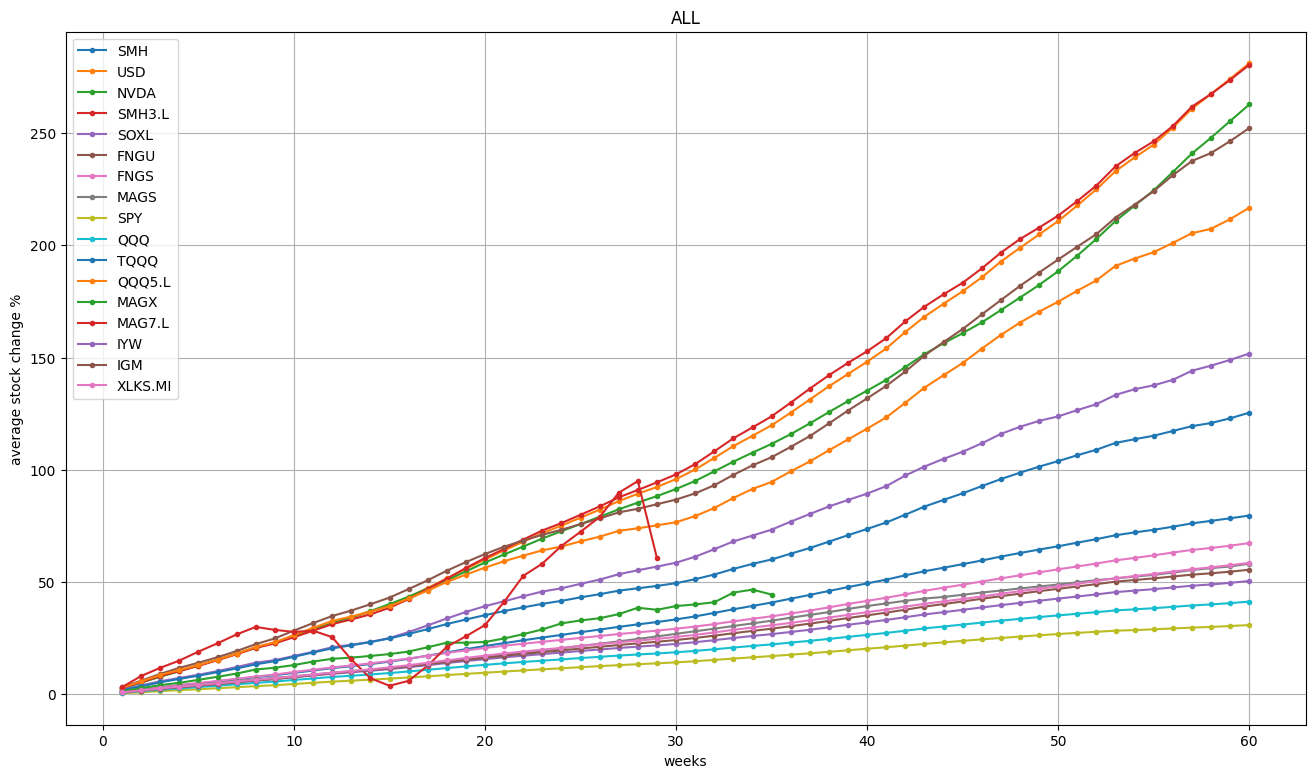

In [17]:
plot(title='ALL', symbols=[
    'SMH','USD','NVDA','SMH3.L',
    'SOXL',
    'FNGU','FNGS','MAGS',
    'SPY', 'QQQ', 'TQQQ','QQQ5.L',
    'MAGX','MAG7.L',
    'IYW', 'IGM', 'XLKS.MI',
    # 'NVD3.L',
])

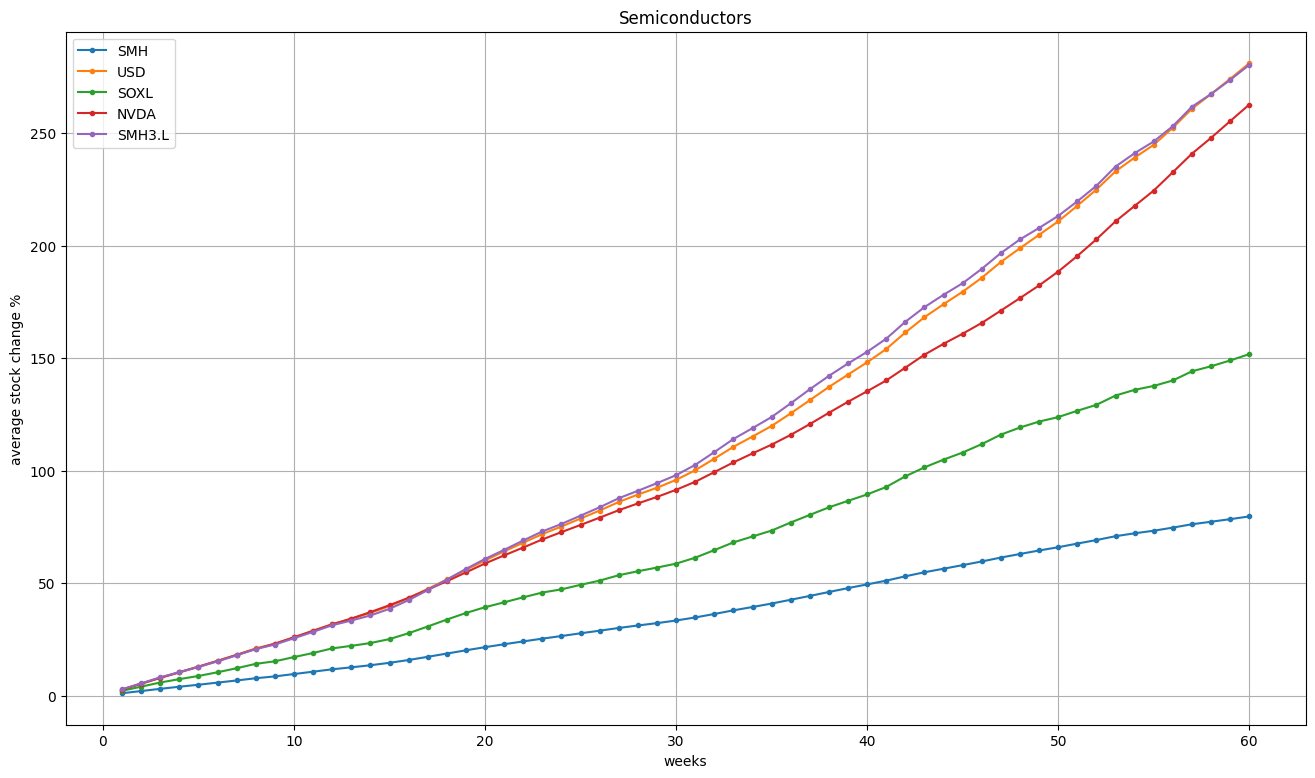

In [18]:
plot(title='Semiconductors', symbols = ['SMH','USD','SOXL','NVDA','SMH3.L',
                                        # 'NVD3.L'
                                        ])

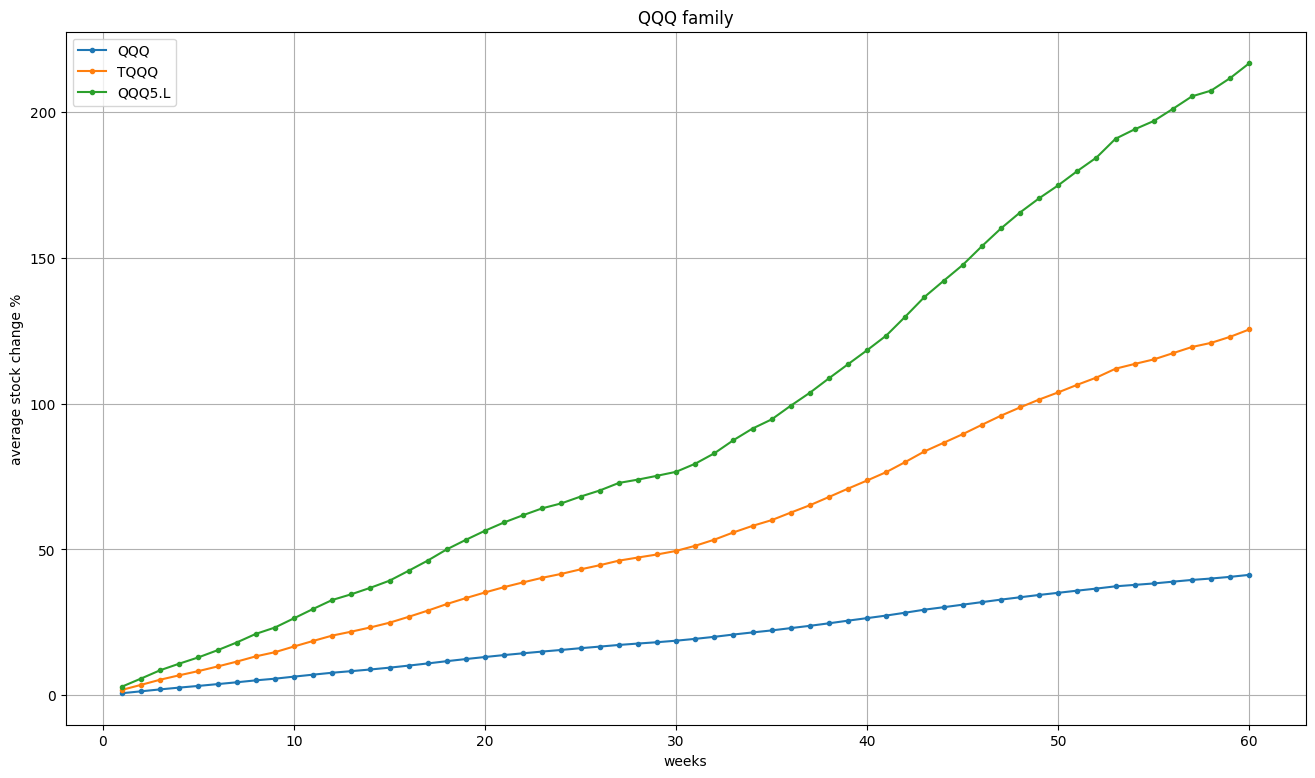

In [19]:
plot(title='QQQ family', symbols = ['QQQ','TQQQ','QQQ5.L'])


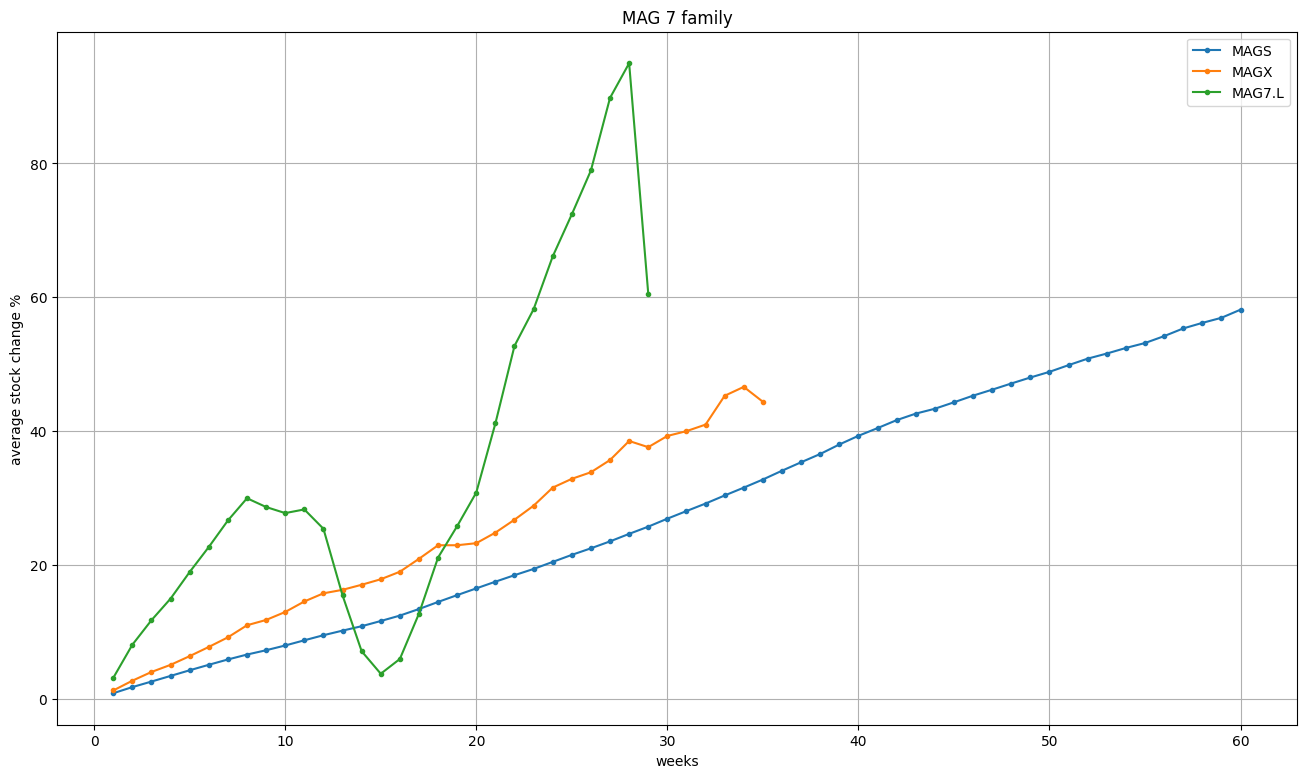

In [20]:
plot(title='MAG 7 family', symbols = ['MAGS','MAGX','MAG7.L'])


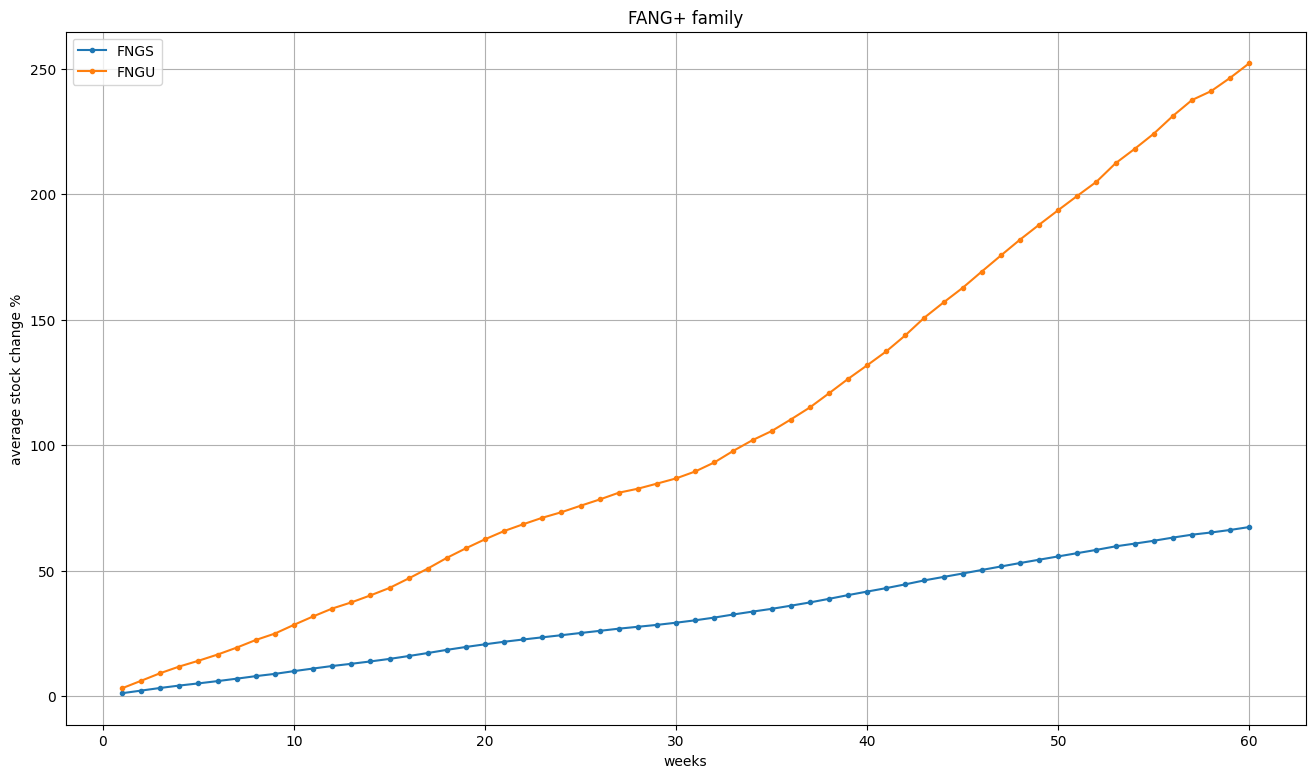

In [21]:
plot(title='FANG+ family', symbols = ['FNGS','FNGU'])


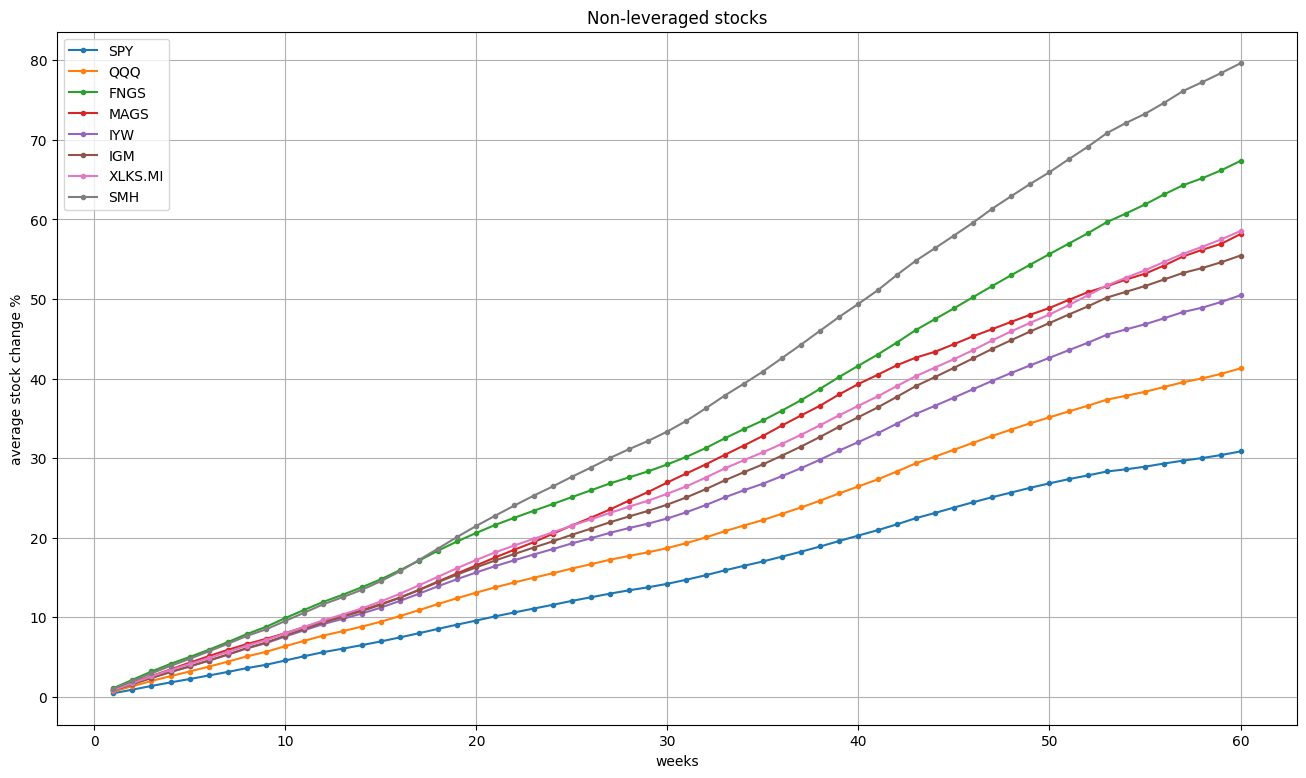

In [22]:
plot(title='Non-leveraged stocks', symbols = ['SPY','QQQ','FNGS','MAGS','IYW','IGM','XLKS.MI','SMH'])


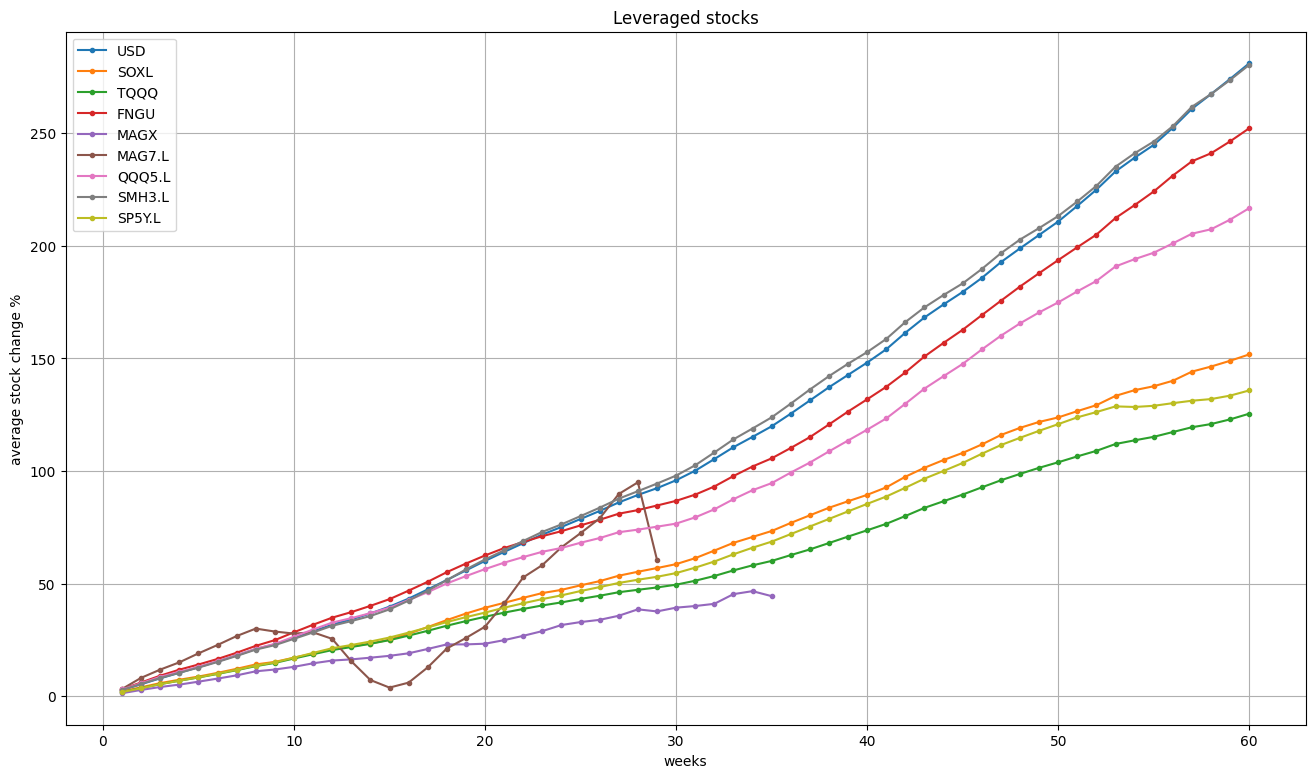

In [23]:
plot(title='Leveraged stocks', symbols = ['USD','SOXL','TQQQ','FNGU','MAGX','MAG7.L',
                                          'QQQ5.L','SMH3.L','SP5Y.L',
                                          # 'NVD3.L',
                                          ])


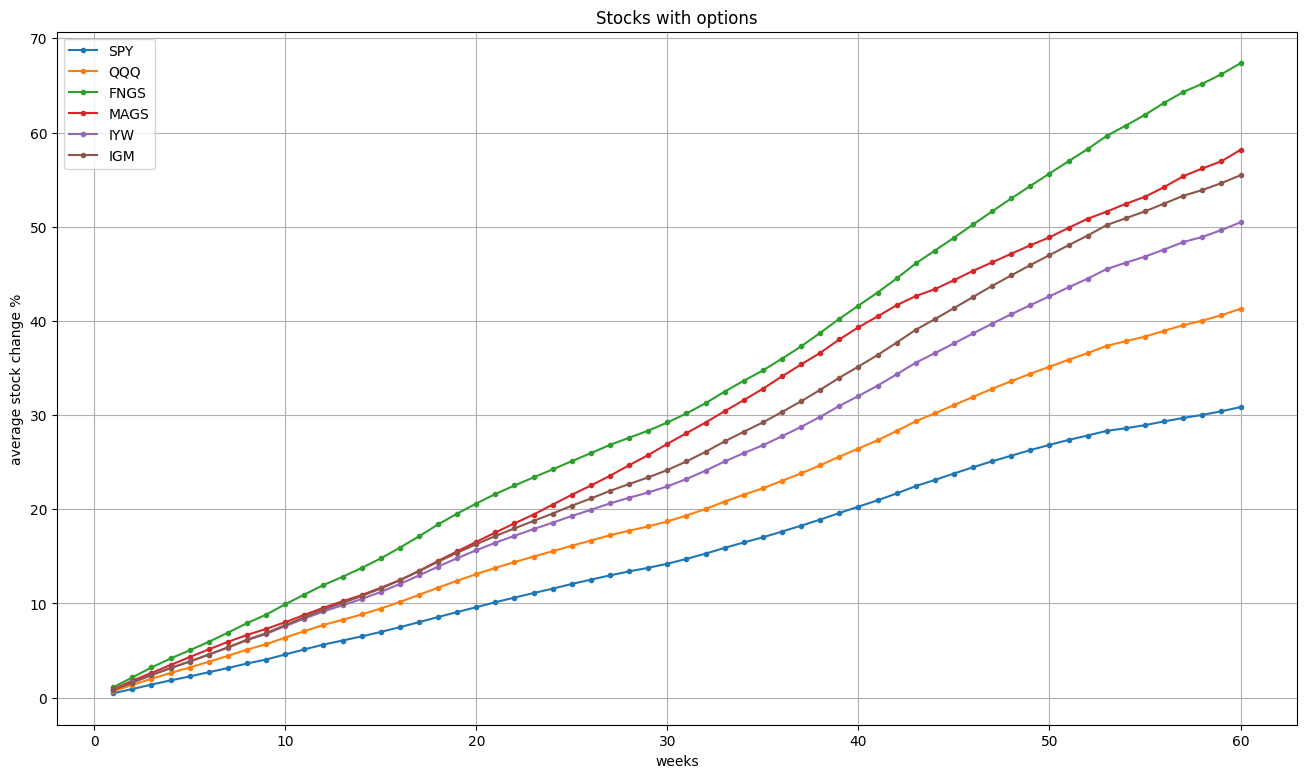

In [24]:

plot(title='Stocks with options', symbols = ['SPY','QQQ','FNGS','MAGS','IYW','IGM'])
